In [37]:
# import os
# import random

# Specify the folder path
# folder_path = "C:\\Users\\shree sai\\Downloads\\asl_alphabet_train\\asl_alphabet_train\\space"

# Get the list of files in the folder
# files = os.listdir(folder_path)

# Calculate the number of files to delete (90% of the total files)
# num_files_to_delete = int(0.96 * len(files))

# Randomly select files to delete

# files_to_delete = random.sample(files, num_files_to_delete)

# Iterate through the files to delete and remove them
# for file_name in files_to_delete:
#     file_path = os.path.join(folder_path, file_name)
#     os.remove(file_path)


In [40]:
# import os
# from PIL import Image

# # Specify the folder containing the subfolders with images
# main_folder = "C:\\Users\\shree sai\\Downloads\\asl_alphabet_train\\asl_alphabet_train"

# # Define the target size for resizing
# target_size = (224, 224)

# # Iterate through each folder
# for folder_name in os.listdir(main_folder):
#     folder_path = os.path.join(main_folder, folder_name)
#     if os.path.isdir(folder_path):
#         print("Processing folder:", folder_name)
#         # Iterate through each image file in the folder
#         for filename in os.listdir(folder_path):
#             if filename.endswith(".jpg") or filename.endswith(".png"):  # Add more extensions if needed
#                 image_path = os.path.join(folder_path, filename)
#                 # Open the image using PIL
#                 img = Image.open(image_path)
#                 # Resize the image
#                 img_resized = img.resize(target_size, Image.LANCZOS)  # Resizing with Lanczos resampling for anti-aliasing
#                 # Save the resized image, overwriting the original
#                 img_resized.save(image_path)
#                 print("Resized:", filename)

# print("Resizing complete.")


Processing folder: A
Resized: A10.jpg
Resized: A1008.jpg
Resized: A1025.jpg
Resized: A1028.jpg
Resized: A1035.jpg
Resized: A1044.jpg
Resized: A105.jpg
Resized: A107.jpg
Resized: A1096.jpg
Resized: A1102.jpg
Resized: A1111.jpg
Resized: A1116.jpg
Resized: A112.jpg
Resized: A1120.jpg
Resized: A1125.jpg
Resized: A1132.jpg
Resized: A1230.jpg
Resized: A1287.jpg
Resized: A1290.jpg
Resized: A1315.jpg
Resized: A1318.jpg
Resized: A133.jpg
Resized: A1340.jpg
Resized: A1354.jpg
Resized: A1414.jpg
Resized: A1428.jpg
Resized: A1437.jpg
Resized: A1496.jpg
Resized: A1508.jpg
Resized: A1533.jpg
Resized: A165.jpg
Resized: A1689.jpg
Resized: A1710.jpg
Resized: A1755.jpg
Resized: A1794.jpg
Resized: A1802.jpg
Resized: A1818.jpg
Resized: A1840.jpg
Resized: A1843.jpg
Resized: A1848.jpg
Resized: A1880.jpg
Resized: A1891.jpg
Resized: A1940.jpg
Resized: A2016.jpg
Resized: A202.jpg
Resized: A2079.jpg
Resized: A2086.jpg
Resized: A2090.jpg
Resized: A2098.jpg
Resized: A2101.jpg
Resized: A2105.jpg
Resized: A213.jpg


In [82]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the CNN model
def create_cnn_model(input_shape=(224, 224, 3), num_classes=29):  # Change num_classes to 29
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes)  # Change this line to have 29 output neurons
    ])
    
    return model

# Load and preprocess your dataset
train_data_dir = "C:\\Users\\shree sai\\Downloads\\asl_alphabet_train\\asl_alphabet_train"

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='sparse')

# Create an instance of the model
model = create_cnn_model()

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=15)

# Save the model
model.save("trained_model.h5")

print("Model trained and saved.")


Found 3480 images belonging to 29 classes.
Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.0479 - loss: 3.4166
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.1250 - loss: 3.0755
Epoch 3/15


C:\Users\shree sai\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


108/108 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.2756 - loss: 2.5665
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 308us/step - accuracy: 0.5312 - loss: 1.8658
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.5565 - loss: 1.5392
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 196us/step - accuracy: 0.4375 - loss: 1.7246
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.7477 - loss: 0.8232
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 131us/step - accuracy: 0.5938 - loss: 1.0592
Epoch 9/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.8676 - loss: 0.4499
Epoch 10/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 224us/step - accuracy: 0.8438 - loss: 0.5870
Epoch 11/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9238 - loss: 0.2624
Epoch 12/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 131us/step - accuracy: 0.9688 - loss: 0.2579
Epoch 13/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9437 - loss: 0.1787
Epoch 14/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 3

Model trained and saved.


In [77]:
# import os
# from PIL import Image

# # Specify the folder containing the subfolders with images
# main_folder = "C:\\Users\\shree sai\\Downloads\\asl_alphabet_test"

# # Define the target size for resizing
# target_size = (224, 224)

# # Iterate through each folder
# for folder_name in os.listdir(main_folder):
#     folder_path = os.path.join(main_folder, folder_name)
#     if os.path.isdir(folder_path):
#         print("Processing folder:", folder_name)
#         # Iterate through each image file in the folder
#         for filename in os.listdir(folder_path):
#             if filename.endswith(".jpg") or filename.endswith(".png"):  # Add more extensions if needed
#                 image_path = os.path.join(folder_path, filename)
#                 # Open the image using PIL
#                 img = Image.open(image_path)
#                 # Resize the image
#                 img_resized = img.resize(target_size, Image.LANCZOS)  # Resizing with Lanczos resampling for anti-aliasing
#                 # Save the resized image, overwriting the original
#                 img_resized.save(image_path)
#                 print("Resized:", filename)

# print("Resizing complete.")


Processing folder: asl_alphabet_test
Resized: A_test.jpg
Resized: B_test.jpg
Resized: C_test.jpg
Resized: D_test.jpg
Resized: E_test.jpg
Resized: F_test.jpg
Resized: G_test.jpg
Resized: H_test.jpg
Resized: I_test.jpg
Resized: J_test.jpg
Resized: K_test.jpg
Resized: L_test.jpg
Resized: M_test.jpg
Resized: nothing_test.jpg
Resized: N_test.jpg
Resized: O_test.jpg
Resized: P_test.jpg
Resized: Q_test.jpg
Resized: R_test.jpg
Resized: space_test.jpg
Resized: S_test.jpg
Resized: T_test.jpg
Resized: U_test.jpg
Resized: V_test.jpg
Resized: W_test.jpg
Resized: X_test.jpg
Resized: Y_test.jpg
Resized: Z_test.jpg
Resizing complete.


In [108]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model("trained_model.h5")
actual_label=[]
# Directory containing images for testing
test_dir = "C:\\Users\\shree sai\\Downloads\\asl_alphabet_test\\asl_alphabet_test"  # Replace "path_to_test_directory" with the actual path

# Get a list of all image filenames in the directory
image_files = [f for f in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir, f))]
actual_label_map = [idx for idx, label in enumerate(image_files)]

# Loop through each image file
for  filename  in image_files:
    # Load and preprocess the image
    img_path = os.path.join(test_dir, filename)
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Convert single image to batch of size 1
    img_array = img_array / 255.0  # Normalize the image

    # Make predictions
    predictions = model.predict(img_array)
    actual_label.append(filename)
    # Get the predicted class label
    predicted_class = np.argmax(predictions)

    # Print the predicted class for each image
    print("Image:", filename, "Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Image: A_test.jpg Predicted class: 18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Image: B_test.jpg Predicted class: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: C_test.jpg Predicted class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: D_test.jpg Predicted class: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: E_test.jpg Predicted class: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image: F_test.jpg Predicted class: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: G_test.jpg Predicted class: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Image: H_test.jpg Predicted class: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Image: I_test.jpg Predicted class: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image: J_test.jpg Predicted class: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: K_test.jpg Predicted class: 18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Image: L_test.jpg Predicted class: 11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Image: M_test.jpg Predicted class: 12
1/1 ━━━━━━━━━━━━━━━

In [104]:
predicted_classes

array([18,  1,  2,  5,  4,  5,  6,  7, 10,  9, 18, 11, 12, 13, 14, 15, 16,
       21, 18, 19, 20, 20, 21, 23, 24, 25, 27, 28], dtype=int64)

In [110]:
 num_correct = sum(1 for pred, actual in zip(predicted_classes, actual_label_map) if pred == actual)
total_predictions = len(predicted_classes)
accuracy = num_correct / total_predictions

print("Accuracy:", accuracy)

Accuracy: 0.6785714285714286


In [75]:
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━

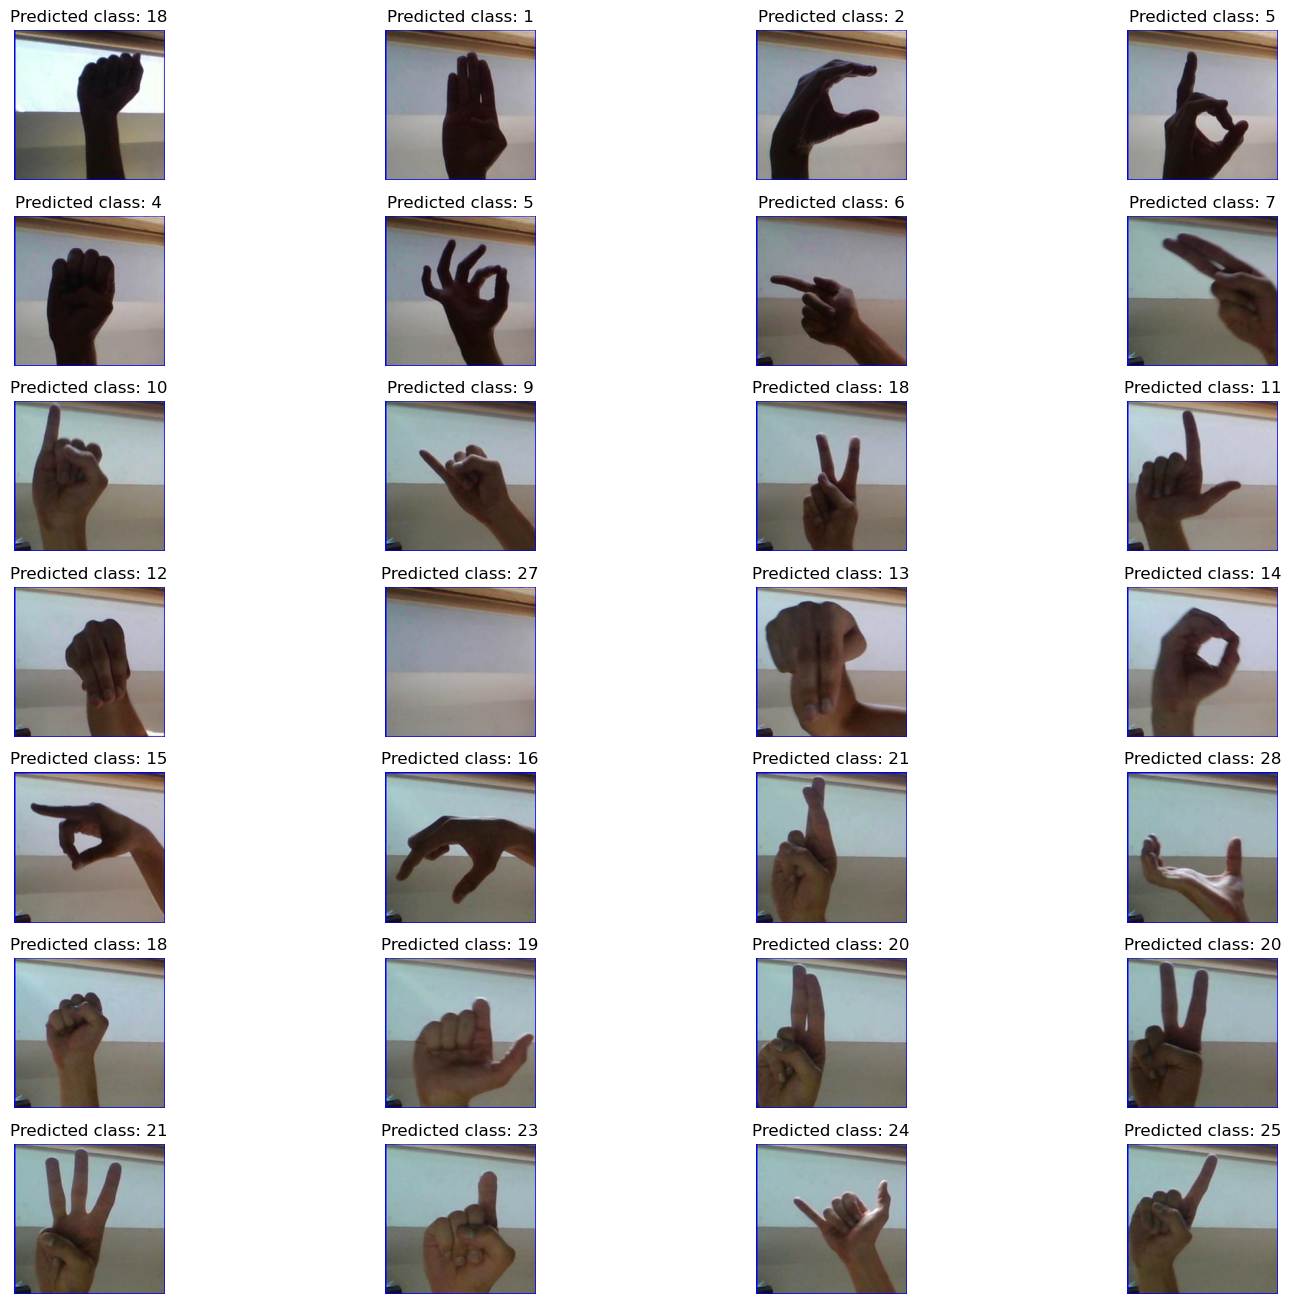

In [96]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("trained_model.h5")

# Directory containing images for testing
test_dir = "C:\\Users\\shree sai\\Downloads\\asl_alphabet_test\\asl_alphabet_test"  
# Get a list of all image filenames in the directory
image_files = [f for f in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir, f))]

# Plotting settings
num_cols = 4  # Number of columns in the grid
num_rows = len(image_files) // num_cols + 1  # Calculate number of rows based on number of images

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Loop through each image file
for idx, filename in enumerate(image_files):
    # Load and preprocess the image
    img_path = os.path.join(test_dir, filename)
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Convert single image to batch of size 1
    img_array = img_array / 255.0  # Normalize the image

    # Make predictions
    predictions = model.predict(img_array)
    
    # Get the predicted class label
    predicted_class = np.argmax(predictions)
    
    # Plot the image with predicted class as title
    ax = axes[idx // num_cols, idx % num_cols]
    ax.imshow(img)
    ax.set_title(f"Predicted class: {predicted_class}")
    ax.axis('off')

# Remove empty subplots
for i in range(len(image_files), num_cols * num_rows):
    axes.flatten()[i].remove()

plt.tight_layout()
plt.show()
